## Ch 6 - Interference Channels

Reference: Ch 6 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
)

### Thm 6.1 (Strong Interference)


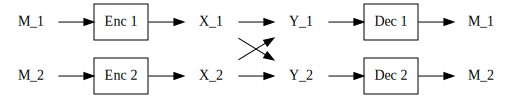

In [2]:
X1, X2 = rv_array("X", 1, 3)
Y1, Y2 = rv_array("Y", 1, 3)
M1, M2 = rv_array("M", 1, 3)
V1, V2 = rv_array("V", 1, 3)
R1, R2 = real_array("R", 1, 3)
U, Q = rv("U, Q")

model = CodingModel()     # Define interference channel [Ahlswede 1974]
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M1, X1,
        label = "Enc 1")  # Encoder 1 maps M1 to X1
model.add_node(M2, X2,
        label = "Enc 2")  # Encoder 2 maps M2 to X2
model.add_edge(X1+X2, Y1) # Channel X1,X2 -> Y1
model.add_edge(X1+X2, Y2) # Channel X1,X2 -> Y2
model.add_node(Y1, M1,    # Decoder 1 maps Y1 to M1,
  label = "Dec 1")
model.add_node(Y2, M2,    # Decoder 2 maps Y2 to M2,
  label = "Dec 2")

model.graph()             # Draw diagram

In [3]:
# Strong interference condition
si = ((markov(X1, U, X2) & markov(U, X1+X2, Y1+Y2)) >> (
    (I(X1 & Y1 | X2+U) <= I(X1 & Y2 | X2+U)) 
    & (I(X2 & Y2 | X1+U) <= I(X2 & Y1 | X1+U))
)).forall(U)
si.add_meta("pf_note", ["strong int."]) # Add a note to the proof
model &= si

In [4]:
r = model.get_inner(is_proof=True)  # Automatic inner bound, gives superposition region
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [5]:
# Converse proof
model.proof_outer(r)

### Thm 6.2 (Gaussian IC, Strong Interference)

Skipped

### Thm 6.3 (Gaussian IC, Weak Interference)

Skipped

### Thm 6.4 (Han-Kobayashi)


In [6]:
model = CodingModel()     # Define interference channel [Ahlswede 1974]
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M1, X1,
        label = "Enc 1")  # Encoder 1 maps M1 to X1
model.add_node(M2, X2,
        label = "Enc 2")  # Encoder 2 maps M2 to X2
model.add_edge(X1+X2, Y1) # Channel X1,X2 -> Y1
model.add_edge(X1+X2, Y2) # Channel X1,X2 -> Y2
model.add_node(Y1, M1,    # Decoder 1 maps Y1 to M1,
  label = "Dec 1")
model.add_node(Y2, M2,    # Decoder 2 maps Y2 to M2,
  label = "Dec 2")

# Use the num_dummy=1 option to increase the number of dummy auxiliaries
# May result in bigger region at the expense of longer running time

# Automatic inner bound, gives [Han-Kobayashi 1981]
r = model.get_inner(num_dummy=1, is_proof=True)  
r.display(note=True)

<IPython.core.display.Math object>

### Thm 6.5 (Injective Deterministic IC)

Skipped

### Thm 6.6 (Half-Bit Theorem)

Skipped

------
### Z Interference Channel

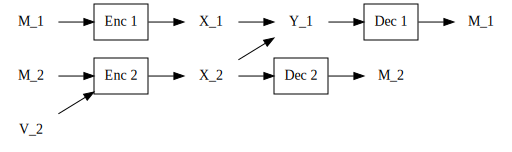

In [7]:
model = CodingModel()     # Define interference channel
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.set_rate(V2, 0)     # Dummy message with rate 0
model.add_node(M1, X1,
        label = "Enc 1")  # Encoder 1 maps M1 to X1
model.add_node(M2+V2, X2,
        label = "Enc 2")  # Encoder 2 maps M2,V2 to X2
model.add_edge(X1+X2, Y1) # Channel X1,X2 -> Y1
model.add_node(Y1, M1,    # Decoder 1 maps Y1 to M1
        label = "Dec 1")
model.add_node(X2, M2,    # Decoder 2 maps X2 to M2
        label = "Dec 2")

model.graph()             # Draw diagram

In [8]:
r = model.get_inner(is_proof=True)  # Automatic inner bound
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 6.
- R. Ahlswede, "The capacity region of a channel with two senders and two receivers," Ann. Probab., vol. 2, no. 5, pp. 805-814, 1974.
-  T. S. Han and K. Kobayashi, "A new achievable rate region for the interference channel," IEEE Trans. Inf. Theory, vol. 27, no. 1, pp. 49-60, Jan. 1981.